In [772]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualizer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


First, we need to import our data into our system using `pd.read_csv()`.

Then, use `describe()` to see the analysis of the data.

In [773]:
file_path = "framingham.csv"
data = pd.read_csv(file_path)

data = data.dropna()

data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


From the table above, the column `TenYearCHD` is the column we need to predict using our model.

Now, we will start building our model from implementing the sigmoid function( or `sigmoid()`).

In [774]:
def sigmoid(z):
    """ 
    computes sigmoid of all elements in z.
    """
    return 1 / (1 + (np.power(np.e,-z, dtype="float64")))

Next, we will define cost function defined as follows.

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}{[-y^{(i)}log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})log(1 - h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^{n}{\theta_j^2}}$$

where $h_\theta(x) = \mbox{sigmoid}(x\theta)$

Note that our cost function $J(\theta)$ contains regularization term. This will allow us to get a simpler model.

`cost_function` should also return the gradient $\frac{\partial J(\theta)}{\partial \theta}$.


$$\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m}{(h_\theta(x^{(i)}) - y^{(i)})x_{j}^{(i)}} \quad\quad\quad\quad\quad\quad \mbox{for  } j = 0 $$

$$\frac{\partial J(\theta)}{\partial \theta_j} = \left(\frac{1}{m} \sum_{i=1}^{m}{(h_\theta(x^{(i)}) - y^{(i)})x_{j}^{(i)}} \right) + \frac{\lambda}{m}\theta_j \quad\quad \mbox{for  } j \ge 1$$

In [775]:
def cost_function(X, y, theta, _lambda):
    """
    calculates cost function J based on parameter theta
    """
    m = y.size
    h = sigmoid(X @ theta)
    J = -(y*np.log(h+ 1e-7) + (1-y)*np.log(1 + 1e-7 -h)).mean() + _lambda * ((theta.T @ theta) - theta[0][0]**2) / (2*m)
    
    grad = (X.T @ (h-y)) / m
    
    return J, grad

By intuition, we know that linear combination of given features will not be a good hypothesis. Thus, making new quadratic features will help us build more accurate model.

In [776]:
def map_feature(X):
    features = np.ones((X.shape[0], 1))
    
    for i in range(X.shape[1]):
        features = np.column_stack((features, X[:,i]))
        for j in range(X.shape[1]):
            features = np.column_stack((features, X[:,i] * X[:,j]))
    
    return features

In [777]:
X = map_feature(data.to_numpy()[:,0:15])
theta = np.ones((X.shape[1], 1))
y = data[["TenYearCHD"]].to_numpy()
_lambda = 1e-9

from sklearn.model_selection import train_test_split

for i in range(1, X.shape[1]):
    X[:,i] = (X[:,i] - X[:,i].mean()) / (X[:,i].std() + 1e-5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=422)

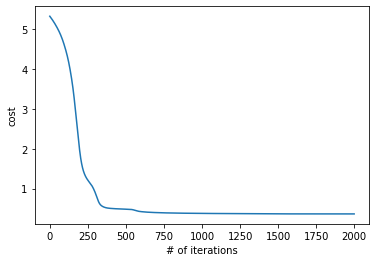

final J(theta) =  0.36422350754194743


In [778]:
xx = []
yy = []
        
for _ in range(2000):
    J, grad = cost_function(X_train, y_train, theta, _lambda)
    theta = 0.999*theta - 0.03*grad
    xx.append(_)
    yy.append(J[0][0])
plt.plot(xx,yy)
plt.xlabel("# of iterations")
plt.ylabel("cost")
plt.show()
print("final J(theta) = ", yy[-1])

In [779]:
def predict(X, theta):
    res = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
        res[i,0] = sigmoid(X[i,:] @ theta) >= 0.5
    return res

In [780]:
prediction = predict(X_train, theta)


cnt = 0
for i in range(X_train.shape[0]):
    cnt += prediction[i,0] == y_train[i,0]

print("accuracy = ", cnt/X_train.shape[0])
print(cnt, "correct out of", X_train.shape[0])

accuracy =  0.8675263774912075
2220 correct out of 2559


In [781]:
prediction = predict(X_test, theta)


cnt = 0
for i in range(X_test.shape[0]):
    cnt += prediction[i,0] == y_test[i,0]

print("accuracy = ", cnt/X_test.shape[0])
print(cnt, "correct out of", X_test.shape[0])

accuracy =  0.8304466727438469
911 correct out of 1097
